### Modeling Distributions
#### Empirical vs Analytic Distributions
Empirical distributions are based on observed data, while analytical distributions are based on mathematical functions. Analytic distributions can be used to model empirical distributions.


#### Exponential Distribution
The CDF of the exponential distribution is of the form `1 - e^-kx`, where k will determine the shape of the distribution. Here are some visuals of the exponential distribution:

In [1]:
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import rcParams
from cycler import cycler

matplotlib.style.use("dark_background")
%matplotlib inline
rcParams["figure.figsize"] = (15, 6)
rcParams["axes.prop_cycle"] = cycler(color=["#4299E1", "#F56565", "#48BB78", "#ED8936", "#9F7AEA", "#ECC94B"])
rcParams["figure.facecolor"] = "#1A202C"
rcParams["axes.facecolor"] = "#2D3748"
rcParams["axes.edgecolor"] = "#A0AEC0"
rcParams["axes.grid"] = True
rcParams["grid.color"] = "#A0AEC0"
rcParams["grid.alpha"] = 0.7
rcParams["axes.titlecolor"] = "#A0AEC0"
rcParams["axes.labelcolor"] = "#A0AEC0"
rcParams["xtick.color"] = "#A0AEC0"
rcParams["ytick.color"] = "#A0AEC0"

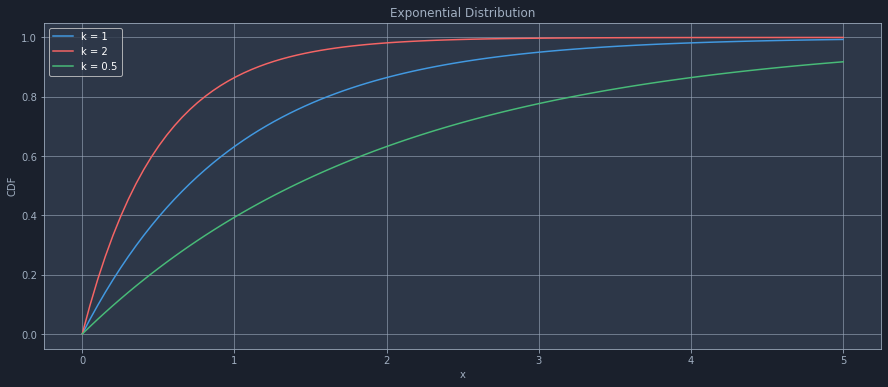

In [2]:
import pandas as pd
import numpy as np

def ExpoCDF(x, k):
    return 1 - np.exp(x * -k)

xValues = np.linspace(0, 5, 100)

plt.plot(xValues, ExpoCDF(xValues, 1), label="k = 1")
plt.plot(xValues, ExpoCDF(xValues, 2), label="k = 2")
plt.plot(xValues, ExpoCDF(xValues, 0.5), label="k = 0.5")
plt.title("Exponential Distribution")
plt.xlabel("x")
plt.ylabel("CDF")
plt.legend(loc=2)

Exponential distributions show up when we measure the times between each event in a series of events, called **interarrival times**. If the events are equally likely to occur at any time, the distribution of interarrival times tend to look like exponential distributions.

To be able to tell if a CDF graphed from empirical distribution have the general shape of an exponential distribution, plot the complementary CDF, `1 - CDF(x)`, on a log-y scale. The result should be a straight line.

Given an empirical distribution, if this transformation produces a straight line, then the exponential distribution is a good model for the dataset.

Text(0, 0.5, 'log CDF')

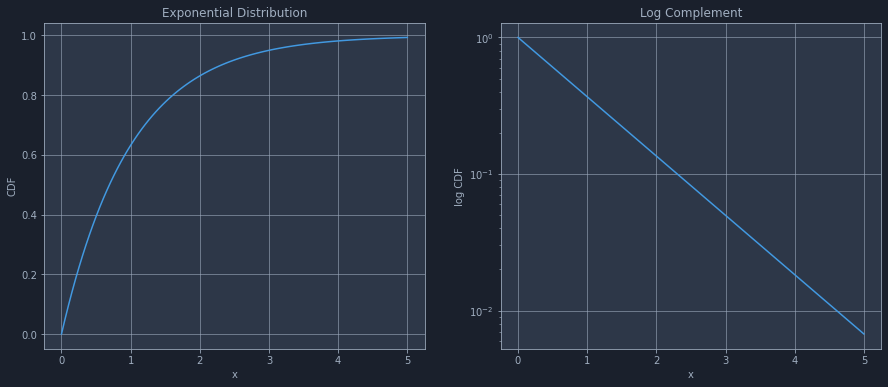

In [3]:
plt.subplot(1, 2, 1)
plt.plot(xValues, ExpoCDF(xValues, 1))
plt.title("Exponential Distribution")
plt.xlabel("x")
plt.ylabel("CDF")

plt.subplot(1, 2, 2)
plt.plot(xValues, 1 - ExpoCDF(xValues, 1))
plt.yscale("log")
plt.title("Log Complement")
plt.xlabel("x")
plt.ylabel("log CDF")

In [4]:
df = pd.read_pickle("nsfg_data.pkl")

def ReverseCMC(cmc):
    year = 1900 + ((cmc - 1) // 12)
    month = cmc - (12 * (year - 1900))
    
    return (year, month)

year, month = ReverseCMC(1197)
print(year, month)

1999 9


#### Normal/Gaussian Distribution
A distribution characterized by two parameters, mean (mu) and standard deviation (sigma). When the mean is 0 and the standard deviation is 1, the distribution is called the **standard normal distribution**. This is how changing the mean changes the graph:

Text(0.5, 1.0, 'Changes To Mean')

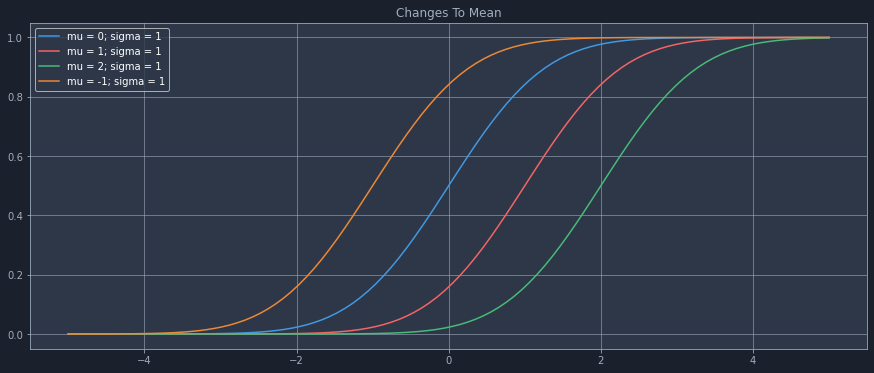

In [5]:
import scipy.stats

def NormCDF(x, mu, sigma):
    return scipy.stats.norm.cdf(x, loc=mu, scale=sigma)

xValues = np.linspace(-5, 5, 100)

plt.plot(xValues, NormCDF(xValues, 0, 1), label="mu = 0; sigma = 1")
plt.plot(xValues, NormCDF(xValues, 1, 1), label="mu = 1; sigma = 1")
plt.plot(xValues, NormCDF(xValues, 2, 1), label="mu = 2; sigma = 1")
plt.plot(xValues, NormCDF(xValues, -1, 1), label="mu = -1; sigma = 1")
plt.legend(loc=2)
plt.title("Changes To Mean")

And this is how the standard deviation changes the graph:

Text(0.5, 1.0, 'Changes To Standard Deviation')

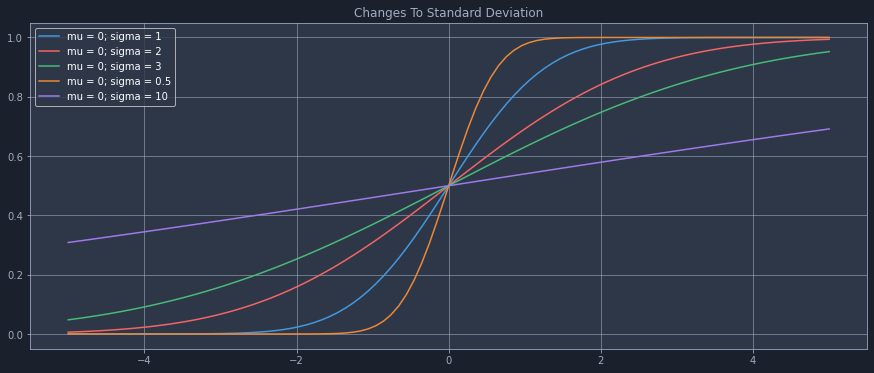

In [6]:
plt.plot(xValues, NormCDF(xValues, 0, 1), label="mu = 0; sigma = 1")
plt.plot(xValues, NormCDF(xValues, 0, 2), label="mu = 0; sigma = 2")
plt.plot(xValues, NormCDF(xValues, 0, 3), label="mu = 0; sigma = 3")
plt.plot(xValues, NormCDF(xValues, 0, 0.5), label="mu = 0; sigma = 0.5")
plt.plot(xValues, NormCDF(xValues, 0, 10), label="mu = 0; sigma = 10")
plt.legend(loc=2)
plt.title("Changes To Standard Deviation")

The CDF of weights of all live births can be modeled with the CDF of a normal distribution with `mu = 7.28` and `sigma = 1.24`:

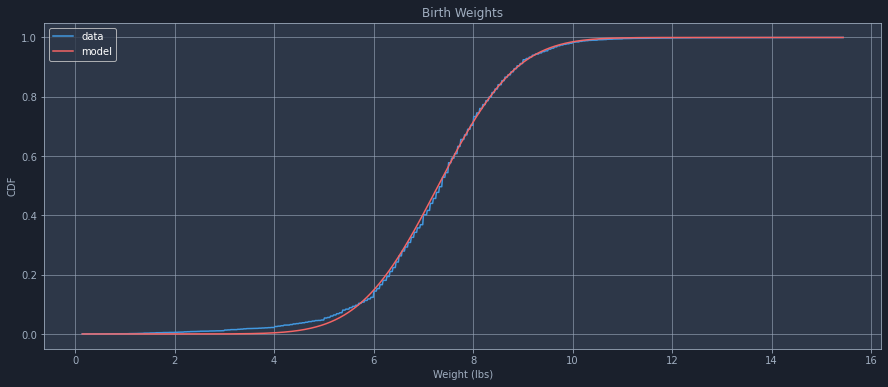

In [7]:
live = df[df["outcome"] == 1]
weights = live["totalwgt_lb"].dropna()

mean = 7.28
std = 1.24

hist, bins = np.histogram(weights, bins=1000, density=True)
offset = bins[1:] - bins[:-1]

plt.plot(bins[:-1] + offset, np.cumsum(hist) / np.cumsum(hist)[-1], label="data")
plt.plot(bins[:-1] + offset, [NormCDF(x, mean, std) for x in bins[:-1]], label="model")
plt.title("Birth Weights")
plt.xlabel("Weight (lbs)")
plt.ylabel("CDF")
plt.legend(loc=2)

Below the 10th percentile (CDF <= 0.1), there seems to be more light babies than expected in a normal distribution.

Let's try doing the same thing for pregnancy length:

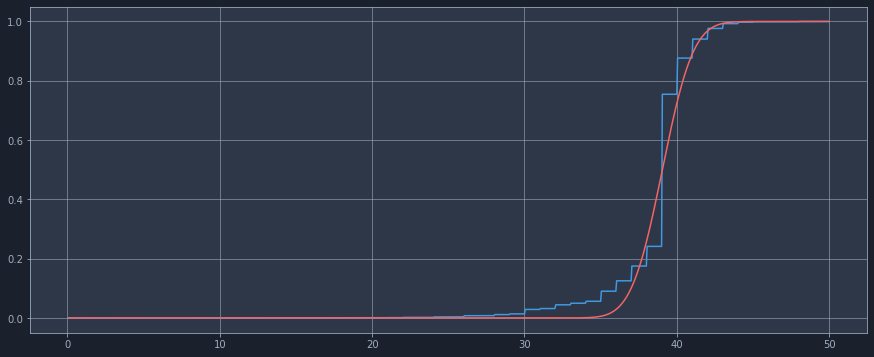

In [8]:
pregLengths = live["prglngth"].dropna()

mean = 39
std = 1.6

hist, bins = np.histogram(pregLengths, bins=1000, density=True)
offset = bins[1:] - bins[:-1]

plt.plot(bins[:-1] + offset, np.cumsum(hist) / np.cumsum(hist)[-1], label="data")
plt.plot(bins[:-1] + offset, [NormCDF(x, mean, std) for x in bins[:-1]], label="model")

Below the 20th percentile (CDF <= 0.2), there seems to be more babies born earlier than expected in a normal distribution.

#### Normal Probability Plot
A normal probability plot could be used to test whether the normal distribution is a good model for a dataset.

Here is how to generate it:
1. Sort the values in the sample.
2. From a standard normal distribution (mu = 0 and sigma = 1), generate a random sample with the same size as the sample, and sort it.
3. Plot the sorted values from the random sample (x) versus the sample (y).

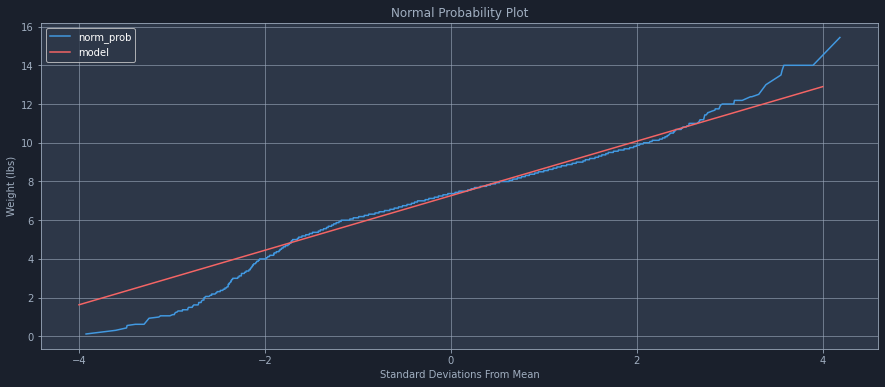

In [9]:
from random import random

sortedWeights = weights.sort_values()

mean = sortedWeights.mean()
std = sortedWeights.std()

randomSample = np.random.standard_normal(sortedWeights.count())
randomSample.sort()

plt.plot(randomSample, sortedWeights, label="norm_prob")

xValues = np.linspace(-4, 4, 100)
yValues = (std * xValues) + mean
plt.plot(xValues, yValues, label="model")
plt.title("Normal Probability Plot")
plt.xlabel("Standard Deviations From Mean")
plt.ylabel("Weight (lbs)")
plt.legend(loc=2)

As we can see, the curve matches the model near the mean, but deviate in the tails. This means that the heaviest babies are heavier and the lightests babies are lighter than what the model expects.

Based on this, the normal model describes the distribution well within a few standard deviations from the mean, but not in the tails.

Let's try doing the same thing for pregnancy length:

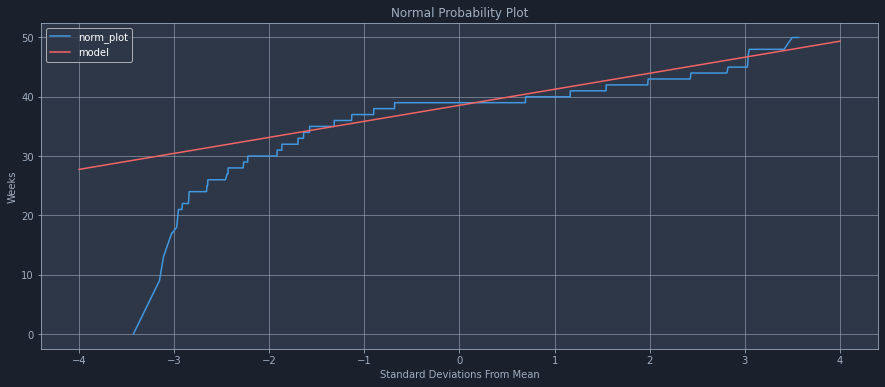

In [10]:
sortedPregLengths = pregLengths.sort_values()

mean = sortedPregLengths.mean()
std = sortedPregLengths.std()

randomSample = np.random.standard_normal(sortedPregLengths.count())
randomSample.sort()

plt.plot(randomSample, sortedPregLengths, label="norm_plot")

xValues = np.linspace(-4, 4, 100)
yValues = (std * xValues) + mean
plt.plot(xValues, yValues, label="model")
plt.title("Normal Probability Plot")
plt.xlabel("Standard Deviations From Mean")
plt.ylabel("Weeks")
plt.legend(loc=2)

As we can see, the curve matches the model near the mean, but deviate when the standard deviation <= -1.5. This means that conceptions that happen the earliest happen earlier than what the model expects.

Based on this, it doesn't seem like normal distribution is a good model to use for this distribution.

#### The Lognormal Distribution
If the logarithms of a set of values have a normal distribution, then the values have a **lognormal distribution**. The parameters used are also mu and sigma, but these are not the mean and standard deviation of the variable of the data set itself, but the natural log of the variable.

If a sample is approximately lognormal and its CDF is plotted on a log-x scale, it will have the shape of a normal distribution, like so:

This is how mu changes the graph:

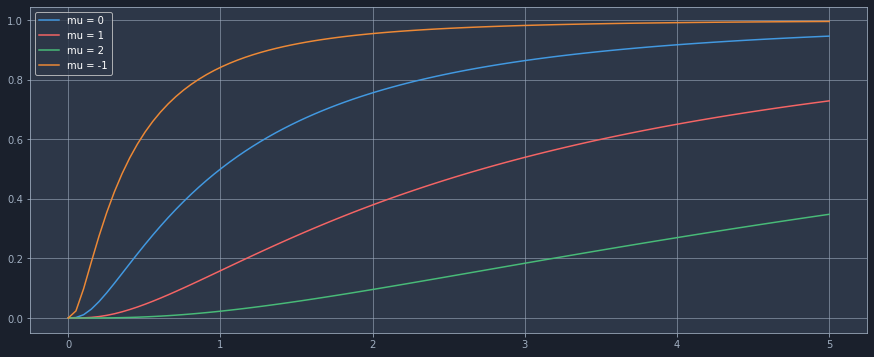

In [11]:
xValues = np.linspace(0.0001, 5, 100)

plt.plot(xValues, NormCDF(np.log(xValues), 0, 1), label="mu = 0")
plt.plot(xValues, NormCDF(np.log(xValues), 1, 1), label="mu = 1")
plt.plot(xValues, NormCDF(np.log(xValues), 2, 1), label="mu = 2")
plt.plot(xValues, NormCDF(np.log(xValues), -1, 1), label="mu = -1")
plt.legend(loc=2)

And this is how sigma changes the graph:

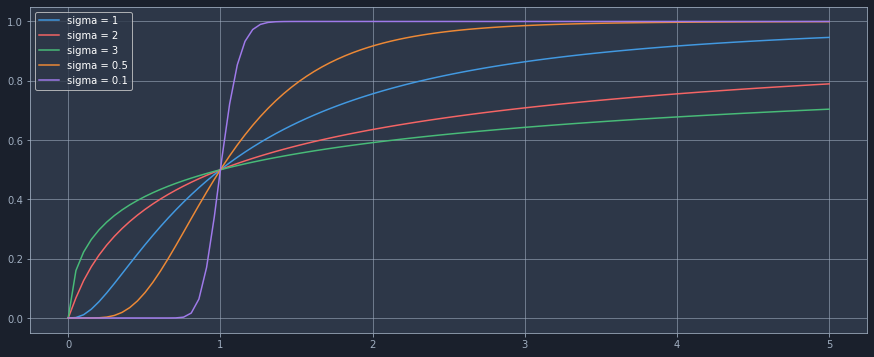

In [12]:
plt.plot(xValues, NormCDF(np.log(xValues), 0, 1), label="sigma = 1")
plt.plot(xValues, NormCDF(np.log(xValues), 0, 2), label="sigma = 2")
plt.plot(xValues, NormCDF(np.log(xValues), 0, 3), label="sigma = 3")
plt.plot(xValues, NormCDF(np.log(xValues), 0, 0.5), label="sigma = 0.5")
plt.plot(xValues, NormCDF(np.log(xValues), 0, 0.1), label="sigma = 0.1")
plt.legend(loc=2)

#### The Pareto Distribution
The Pareto distribution looks almost like exponential distribution, but is heavy tailed, with the probability for both small and very large values being higher than an exponential distribution. The parameters for this distribution is `x_m`, which is the minimum possible value of the variable set, and `a`. The CDF of the Pareto distribution is `1 - ((x_m / x)^a)` if `x >= x_m`, 0 otherwise.

This is how `x_m` changes the graph:

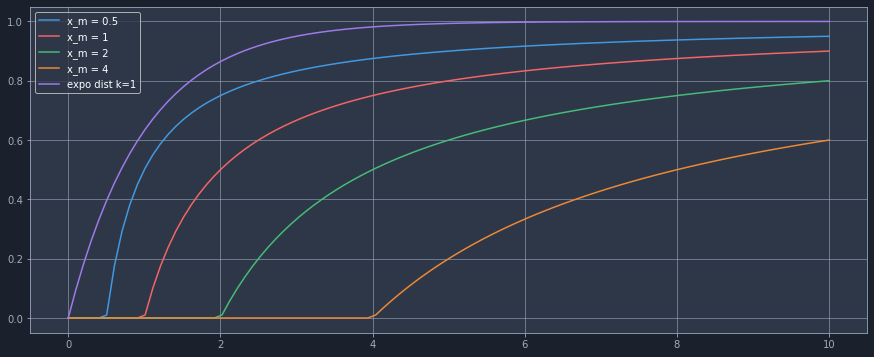

In [13]:
def ParetoCDF(x, x_m, a):
    if x >= x_m:
        return 1 - ((x_m / x) ** a)
    return 0

xValues = np.linspace(0, 10, 100)

plt.plot(xValues, [ParetoCDF(x, 0.5, 1) for x in xValues], label="x_m = 0.5")
plt.plot(xValues, [ParetoCDF(x, 1, 1) for x in xValues], label="x_m = 1")
plt.plot(xValues, [ParetoCDF(x, 2, 1) for x in xValues], label="x_m = 2")
plt.plot(xValues, [ParetoCDF(x, 4, 1) for x in xValues], label="x_m = 4")
plt.plot(xValues, ExpoCDF(xValues, 1), label="expo dist k=1")
plt.legend(loc=2)

And this is how `a` changes the graph:

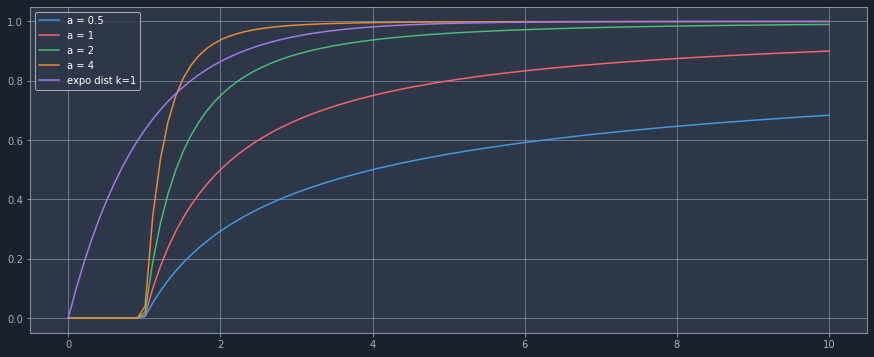

In [14]:
plt.plot(xValues, [ParetoCDF(x, 1, 0.5) for x in xValues], label="a = 0.5")
plt.plot(xValues, [ParetoCDF(x, 1, 1) for x in xValues], label="a = 1")
plt.plot(xValues, [ParetoCDF(x, 1, 2) for x in xValues], label="a = 2")
plt.plot(xValues, [ParetoCDF(x, 1, 4) for x in xValues], label="a = 4")
plt.plot(xValues, ExpoCDF(xValues, 1), label="expo dist k=1")
plt.legend(loc=2)

If the complement CDF (CCDF) of the Pareto distribution is plotted on a log-log graph, a line of the form `(x / x_m)^-a` can be used to see if this model fits an empirical distribution well. This is how it looks like:

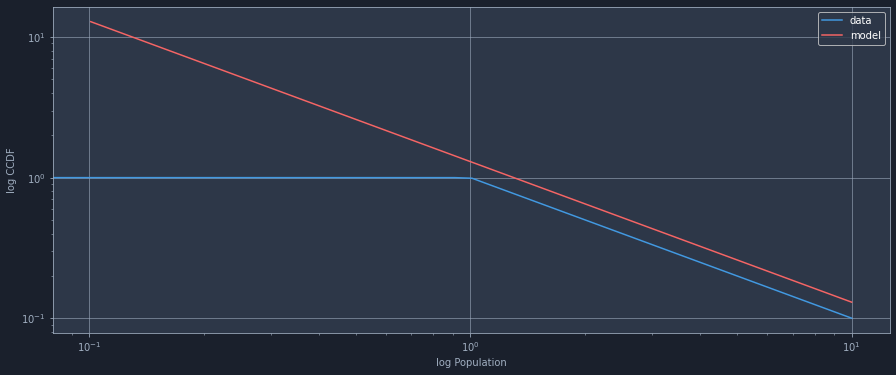

In [15]:
plt.plot(xValues, [1 - ParetoCDF(x, 1, 1) for x in xValues], label="data")
plt.xscale("log")
plt.yscale("log")

a = 1 
# Adding a small value here so we can see both graphs and how they're aligned
x_m = 1 + 0.3

# Starting from the 1st index here, because 0th index is 0
plt.plot(xValues[1:], [(x / x_m) ** -a for x in xValues[1:]], label="model")
plt.xlabel("log Population")
plt.ylabel("log CCDF")
plt.legend(loc=1)

#### Generating Random Numbers
If there is an efficient way to compute the inverse CDF of a distribution model, we can generate random numbers for it. 

The CDF of the exponential distribution is `p = 1 - e^-kx` and solving for x gives us `x = -log(1 - p) / k`. 